In [2]:
import os
os.chdir("/home/ramon/msc/qif-samples/experiments")
from binarymodel1 import ModelBinary as MB
from binarymodel2 import ModelBinaryTUNK as MBP # Model binary "prime"
import numpy as np
import itertools as it
from fractions import Fraction
from math import floor, ceil, factorial, log10
from scipy.special import binom
from multiprocessing import Pool
from libqif.core.secrets import Secrets
from libqif.core.channel import Channel
from libqif.core.hyper import Hyper
from libqif.core.gvulnerability import Gain
import matplotlib.pyplot as plt
from util import float_equal
from tqdm import tqdm
from termcolor import colored

# Compare 3 adversaries. Fixed n, varying m

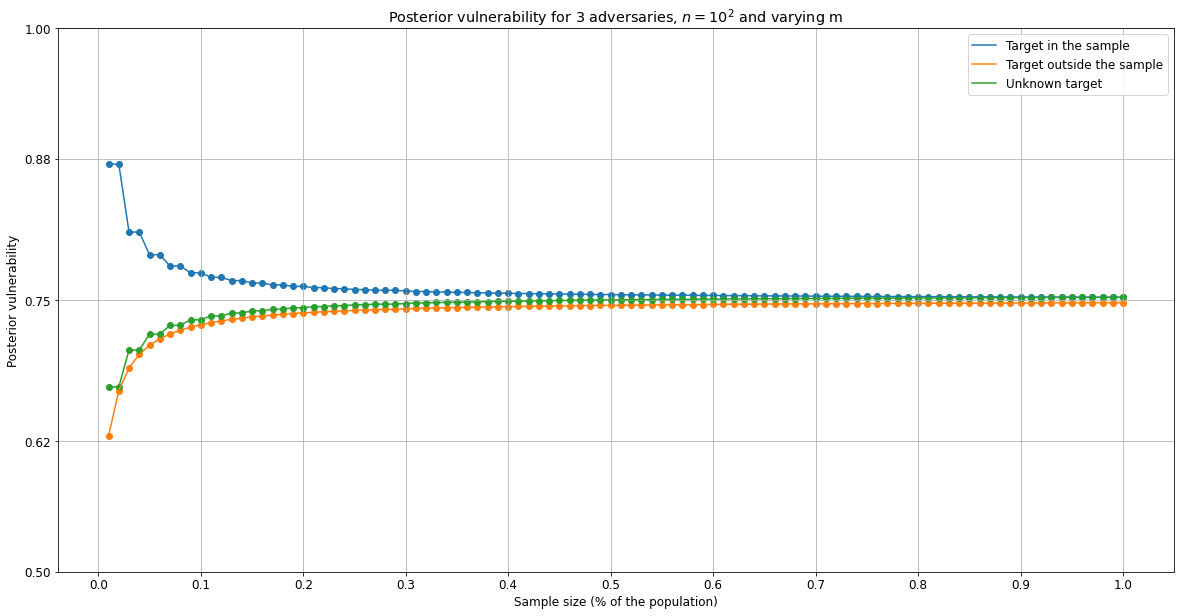

In [24]:
font = {
    "size": 12,
}
plt.rc('font', **font)
plt.figure(figsize=(20,10))

n = 10**2
m_range = np.array(range(1,101))/100
with Pool(6) as p:
    parameters = [(n,int(m*n)) for m in m_range]
    posts_in = p.map(MB.post_vul_privacy_target_in_s_th, parameters)
    posts_out = p.map(MB.post_vul_privacy_target_out_s_th, parameters)
    posts_unk = p.map(MBP.post_vul_th, parameters)

    plt.plot(m_range, posts_in, label="Target in the sample")
    plt.scatter(m_range, posts_in)
    plt.plot(m_range, posts_out, label="Target outside the sample")
    plt.scatter(m_range, posts_out)
    plt.plot(m_range, posts_unk, label="Unknown target")
    plt.scatter(m_range, posts_unk)

    plt.title("Posterior vulnerability for 3 adversaries, $n=10^{%d}$ and varying m"%(int(log10(n))))
    plt.xlabel("Sample size (% of the population)")
    plt.ylabel("Posterior vulnerability")
    plt.xticks(np.array(range(0,101,10))/100)
    plt.yticks([round(x,2) for x in np.linspace(0.5, 1, 5)])
    plt.grid()
    plt.legend()
    plt.show()